## Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
F_stock = pd.read_csv("../../Data/F.csv")
GM_stock = pd.read_csv("../../Data/GM.csv")

In [3]:
F_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,2.149165,2.173495,2.149165,2.153220,0.002859,1089200
1,1972-06-02,2.153220,2.173495,2.141055,2.149165,0.002853,1173500
2,1972-06-05,2.149165,2.169440,2.141055,2.149165,0.002853,5208100
3,1972-06-06,2.149165,2.157275,2.116725,2.124835,0.002821,1421400
4,1972-06-07,2.124835,2.137000,2.112669,2.112669,0.002805,671800
...,...,...,...,...,...,...,...
12197,2020-10-12,7.360000,7.870000,7.330000,7.670000,7.670000,97692900
12198,2020-10-13,7.820000,7.880000,7.630000,7.760000,7.760000,74562600
12199,2020-10-14,7.730000,7.750000,7.550000,7.570000,7.570000,57808900
12200,2020-10-15,7.420000,7.620000,7.370000,7.620000,7.620000,49336200


In [4]:
GM_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-18,35.000000,35.990002,33.889999,34.189999,26.155519,457044300
1,2010-11-19,34.150002,34.500000,33.110001,34.259998,26.209070,107842000
2,2010-11-22,34.200001,34.480000,33.810001,34.080002,26.071363,36650600
3,2010-11-23,33.950001,33.990002,33.189999,33.250000,25.436413,31170200
4,2010-11-24,33.730000,33.799999,33.220001,33.480000,25.612371,26138000
...,...,...,...,...,...,...,...
2490,2020-10-12,32.360001,32.669998,32.119999,32.209999,32.209999,6932600
2491,2020-10-13,32.130001,32.279999,31.469999,31.870001,31.870001,7842100
2492,2020-10-14,32.080002,32.240002,31.530001,31.670000,31.670000,8018000
2493,2020-10-15,30.990000,32.689999,30.950001,32.590000,32.590000,11829800


In [5]:
# extract close price
F_close = F_stock["Close"].values[-2400:-1]
GM_close = GM_stock["Close"].values[-2400:-1]

## Plot Stock Price Ratio

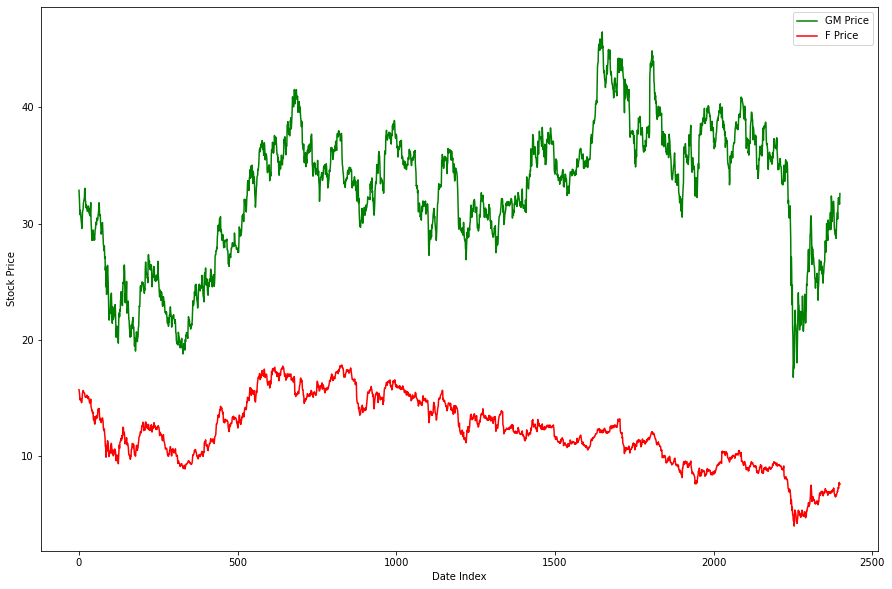

In [6]:
# stock price
x = list(range(len(F_close)))
plt.figure(figsize=(15, 10))
plt.plot(x, GM_close, color="green", label="GM Price")
plt.plot(x, F_close, color="red", label="F Price")
plt.legend()
plt.xlabel("Date Index")
plt.ylabel("Stock Price")
plt.show()

In [7]:
spread_ratio = GM_close/F_close

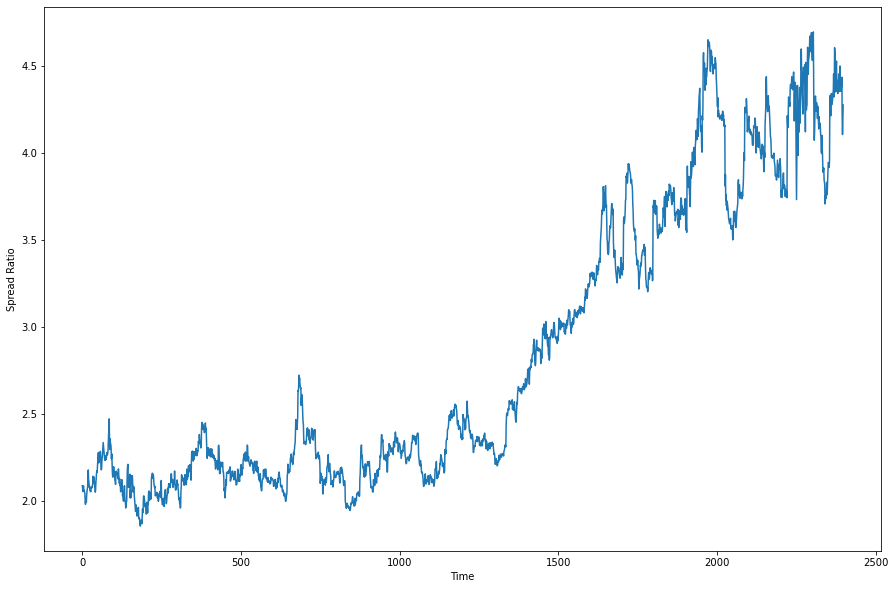

In [16]:
plt.figure(figsize=(15, 10))
plt.xlabel("Time")
plt.ylabel("Spread Ratio")
plt.plot(spread_ratio)

In [8]:
ma_20 = []
pressure = []
support = []

for idx, value in enumerate(spread_ratio):
    if idx < 20:
        continue
    ma_20.append(spread_ratio[idx-20:idx].mean())
    std = spread_ratio[idx-20:idx].std()
    pressure.append(ma_20[-1] + 2*std)
    support.append(ma_20[-1] - 2*std)

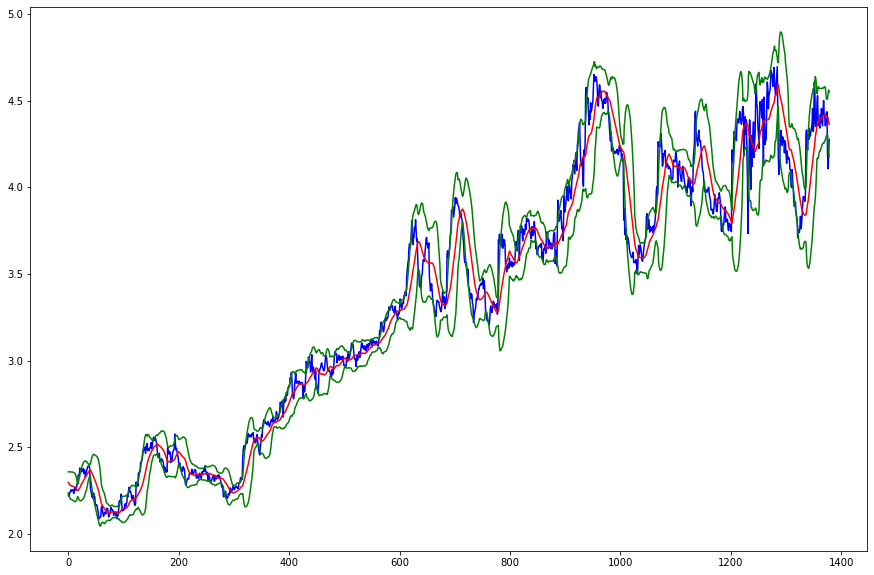

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(spread_ratio[20+1000:], color="blue", label="Spread Ratio")
plt.plot(ma_20[1000:], color="red", label="20MA")
plt.plot(pressure[1000:], color="green", label="Pressure")
plt.plot(support[1000:], color="green", label="Support")

In [21]:
label = []
for idx, value in enumerate(spread_ratio[20:]):
    if value >= pressure[idx] or value <= support[idx]:
        label.append(1)
    elif abs(value-ma_20[idx])<=0.01:
        label.append(-1)
    else:
        label.append(0)

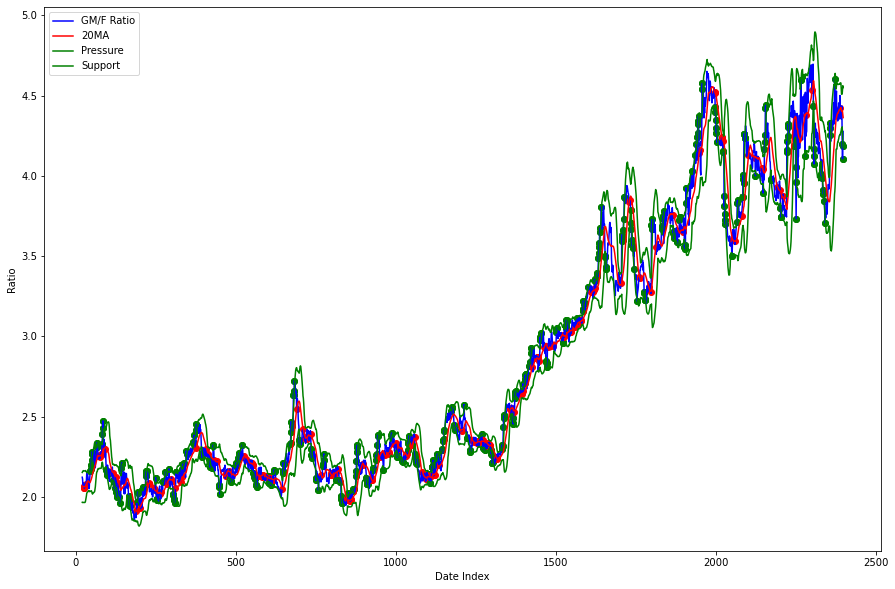

In [22]:
# stock price ratio
x = list(range(len(F_close)))
plt.figure(figsize=(15, 10))
plt.plot(x[20:], spread_ratio[20:], color="blue", label="GM/F Ratio")
plt.plot(x[20:], ma_20, color="red", label="20MA")
plt.plot(x[20:], pressure, color="green", label="Pressure")
plt.plot(x[20:], support, color="green", label="Support")

for idx, value in enumerate(label):
    if value == 1:
        plt.scatter(x[20+idx], spread_ratio[20+idx], color="green")
        plt.scatter(x[20+idx], spread_ratio[20+idx], color="green")
    elif value == -1:
        plt.scatter(x[20+idx], spread_ratio[20+idx], color="red")
        
        
plt.legend()
plt.xlabel("Date Index")
plt.ylabel("Ratio")
plt.show()

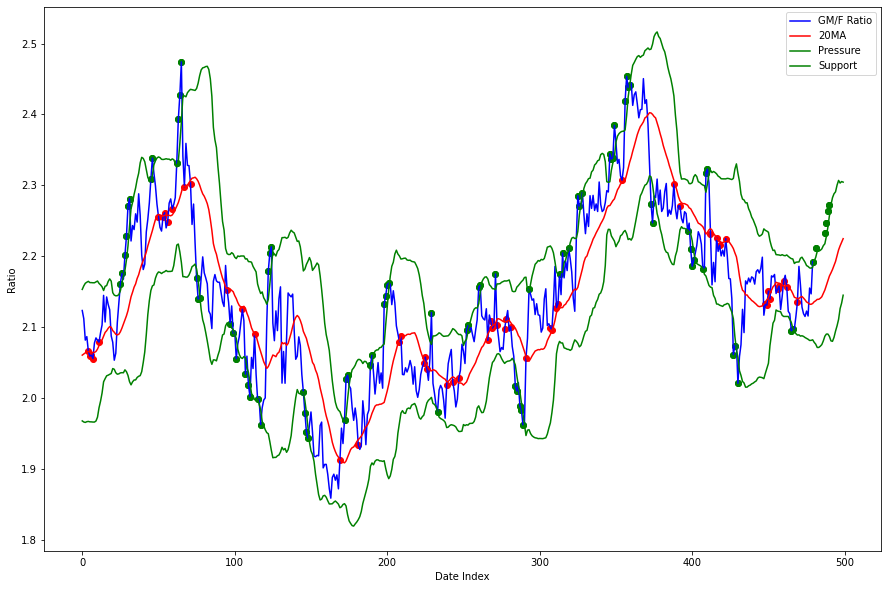

In [24]:
# stock price ratio

plt.figure(figsize=(15, 10))
plt.plot(spread_ratio[20:500], color="blue", label="GM/F Ratio")
plt.plot(ma_20[:500], color="red", label="20MA")
plt.plot(pressure[:500], color="green", label="Pressure")
plt.plot(support[:500], color="green", label="Support")

for idx, value in enumerate(label):
    if idx == 500:
        break
        
    if value == 1:
        plt.scatter(idx, spread_ratio[20+idx], color="green")
        plt.scatter(idx, spread_ratio[20+idx], color="green")
    elif value == -1:
        plt.scatter(idx, spread_ratio[20+idx], color="red")
        
        
plt.legend()
plt.xlabel("Date Index")
plt.ylabel("Ratio")
plt.show()